In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Q-1. A Classification of Fruits

You are provided with a dataset of fruits. Each fruit is characterized by two features: weight (in grams) and
sweetness level (on a scale of 1 to 10). You want to classify a new fruit as either an "Apple" or an "Orange"
based on these features using the KNN algorithm.

Tasks:
1. Implement the KNN algorithm manually with k=3 to classify a new fruit with a weight of 165 grams
and sweetness level of 5.5.
2. Calculate the Euclidean, Manhattan, and Minkowski distances between the new fruit and all the
existing fruits in the dataset. Finally compare the calculated distances.
3. Based on the k-nearest neighbors, determine the label for the new fruit.
4. What is the effect of choosing different values of k (e.g., k=1, k=5) on the classification result?
5. Implement the above using function python program without using scikit learn library.
6. Plot the given samples, the Apple in Red color and the Orange in orange color. Also draw the
decision boundary.

In [153]:
df=pd.read_csv('fruit.csv')
data=df.to_numpy()

In [154]:
def euclidean(x,y):
    return np.sqrt((x[0]-y[0])**2+(x[1]-y[1])**2)


In [155]:
def manhattan(x,y):
    return abs(x[0]-y[0])+abs(x[1]-y[1])

In [156]:
def minkowski(x,y,c):
    return (abs(x[0]-y[0])**c+abs(x[1]-y[1])**c)**(1/c)

In [157]:
def distances(data,sample):
    dists=[]
    idx=1
    for point in data:
        dists.append([idx,euclidean(point[1:3],sample), manhattan(point[1:3],sample), minkowski(point[1:3],
                                                                                                    sample,3)])
        idx+=1
    dists=np.array(dists)
    print("   ID         Euclidean   Manhattan   Minkowski")
    print(dists)
    return dists

In [158]:
def knn(k,data,sample):
    dists=distances(data,sample)
    dist=dists[:,1:2]
    order=np.array(sorted(np.hstack((data,dist)),key=lambda x: x[4])[:k])
    #print(order)
    labels=order[:,3]
    unique, counts = np.unique(labels, return_counts=True) 
    return unique[np.argmax(counts)] 


In [159]:
weight=165
sweetness=5.5

## k=3

In [160]:
k=3
pred=knn(k,data,[weight,sweetness])

   ID         Euclidean   Manhattan   Minkowski
[[ 1.         15.07481343 16.5        15.00499833]
 [ 2.         35.00357125 35.5        35.00003401]
 [ 3.         15.07481343 16.5        15.00499833]
 [ 4.          5.02493781  5.5         5.00166611]
 [ 5.          5.02493781  5.5         5.00166611]
 [ 6.         25.12468905 27.5        25.00833056]]


In [161]:
print("Sample belongs to class:",pred)

Sample belongs to class: Apple


## k=1

In [162]:
k=1
pred=knn(k,data,[weight,sweetness])

   ID         Euclidean   Manhattan   Minkowski
[[ 1.         15.07481343 16.5        15.00499833]
 [ 2.         35.00357125 35.5        35.00003401]
 [ 3.         15.07481343 16.5        15.00499833]
 [ 4.          5.02493781  5.5         5.00166611]
 [ 5.          5.02493781  5.5         5.00166611]
 [ 6.         25.12468905 27.5        25.00833056]]


In [163]:
print("Sample belongs to class:",pred)

Sample belongs to class: Orange


## k=5

In [164]:
k=5
pred=knn(k,data,[weight,sweetness])

   ID         Euclidean   Manhattan   Minkowski
[[ 1.         15.07481343 16.5        15.00499833]
 [ 2.         35.00357125 35.5        35.00003401]
 [ 3.         15.07481343 16.5        15.00499833]
 [ 4.          5.02493781  5.5         5.00166611]
 [ 5.          5.02493781  5.5         5.00166611]
 [ 6.         25.12468905 27.5        25.00833056]]


In [165]:
print("Sample belongs to class:",pred)

Sample belongs to class: Orange


Q-1. B Classification of Fruits

Implement the Python code for Q-1. A using the scikit-learn library. Plot the given samples, using red for
"Apple" and orange for "Orange." Also, plot the decision boundary. Calculate the distances using Euclidean,
Manhattan, and Minkowski metrics, and compare the results.

In [166]:
from sklearn.neighbors import KNeighborsClassifier

In [167]:
neigh = KNeighborsClassifier()

x=data[:,1:3].astype(float)
y=data[:,3]

In [168]:
neigh.fit(x, y)

KNeighborsClassifier()

In [169]:
sample = np.array([[weight,sweetness]])  
prediction = neigh.predict(sample)
print(f'Predicted class: {prediction[0]}')

Predicted class: Orange


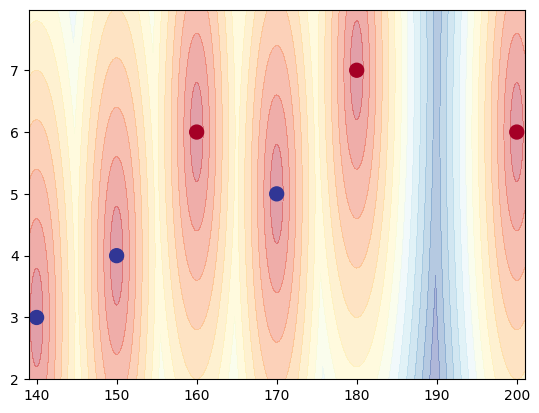

In [179]:
x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, 0.02), np.arange(x2_min, x2_max, 0.02))

distances = np.zeros(xx1.shape)
for i in range(xx1.shape[0]):
    for j in range(xx1.shape[1]):
        point = [xx1[i, j], xx2[i, j]]
        dists =[euclidean(point, p) for p in x]
        distances[i, j] = np.min(dists)

plt.contourf(xx1, xx2, distances, levels=15, alpha=0.4, cmap=plt.cm.RdYlBu)
y_col=(y!=y[0]).astype(int)
plt.scatter(x[:, 0], x[:, 1], c=y_col, cmap=plt.cm.RdYlBu, s=100)

Q-2. A Medical Diagnosis Decision

A dataset is provided to classify patients as "Healthy" or "Sick" based on their Age, Blood Pressure, and
Cholesterol levels.

Tasks:
1. Calculate the entropy for the target variable (Diagnosis).
2. Calculate the information gain for each feature (Age, Blood Pressure, Cholesterol).3. Using the ID3 algorithm, decide which feature should be chosen as the root node for the decision
tree.
4. Build the decision tree and explain the first few splits.
5. Predict whether a 50-year-old patient with low blood pressure and normal cholesterol is healthy or
sick using the tree you built.
6. Implement the above using function python program without using scikit learn library.

In [171]:
samples=pd.read_csv('sick.csv')
samples

,Patient ID,Age,Blood Pressure,Cholesterol,Diagnosis
0,1,30,High,High,Sick
1,2,45,Low,Normal,Healthy
2,3,50,High,High,Sick
3,4,35,Low,Normal,Healthy
4,5,60,High,High,Sick
5,6,55,Low,Normal,Healthy
6,7,40,High,High,Sick
7,8,25,Low,Normal,Healthy
8,9,65,High,High,Sick
9,10,45,Low,Normal,Healthy


In [172]:
def entropy(data, col):
    vals,cnts = np.unique(data[col],return_counts=True)
    e=sum((-cnt/len(data[col]))*np.log2(cnt/len(data[col])) for cnt in cnts)
    return e
e=entropy(samples,'Diagnosis')
print(f'Entropy of Diagnosis:',e)

Entropy of Diagnosis: 1.0


In [173]:
def information_gain(data, split_col, target_col):
    e = entropy(data,target_col)
    vals, cnts = np.unique(data[split_col], return_counts=True)
    weighted_e = sum((cnts[i] / np.sum(cnts)) * entropy(data[data[split_col] == vals[i]], target_col) 
                        for i in range(len(vals)))    
    return e - weighted_e

ig_age = information_gain(samples, 'Age', 'Diagnosis')
ig_bp = information_gain(samples, 'Blood Pressure', 'Diagnosis')
ig_chol = information_gain(samples, 'Cholesterol', 'Diagnosis')

print(f'Information Gain for Age: {ig_age:.4f}')
print(f'Information Gain for Blood Pressure: {ig_bp:.4f}')
print(f'Information Gain for Cholesterol: {ig_chol:.4f}')

Information Gain for Age: 1.0000
Information Gain for Blood Pressure: 1.0000
Information Gain for Cholesterol: 1.0000


In [174]:
def best_feature(data, target_col):
    features = data.columns[1:-1]  
    gains = {feature: information_gain(data, feature, target_col) for feature in features}
    return max(gains, key=gains.get)

In [175]:
def build_tree(data, target_col):
    if len(np.unique(data[target_col])) == 1:
        return data[target_col].iloc[0]
    
    if len(data.columns) == 1:
        return data[target_col].mode()[0]
    
    feature = best_feature(data, target_col)
    tree = {feature: {}}
    
    for value in np.unique(data[feature]):
        subset = data[data[feature] == value]
        tree[feature][value] = build_tree(subset.drop(columns=feature), target_col)
    
    return tree
decision_tree = build_tree(samples, 'Diagnosis')
print("Decision Tree Structure:")
print(decision_tree)

Decision Tree Structure:
{'Age': {25: 'Healthy', 30: 'Sick', 35: 'Healthy', 40: 'Sick', 45: 'Healthy', 50: 'Sick', 55: 'Healthy', 60: 'Sick', 65: 'Sick'}}


In [176]:
def predict(tree, sample):
    if not isinstance(tree, dict):
        return tree 
    feature = next(iter(tree))
    value = sample[feature]
    if value in tree[feature]:
        return predict(tree[feature][value], sample)
    else:
        return "Unknown" 

In [177]:
sample = {'Age': 50, 'BloodPressure': 'Low', 'Cholesterol': 'Normal'}
sample_df = pd.DataFrame([sample])

prediction = predict(decision_tree, sample_df.iloc[0])
print(f'Prediction for the sample: {prediction}')

Prediction for the sample: Sick
